In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
fire=pd.read_csv('Untitled Folder/fire.csv',encoding='euc-kr')
fire

FileNotFoundError: [Errno 2] No such file or directory: 'Untitled Folder/fire.csv'

In [3]:
fire.rename(columns={'flsrpPrcsMnb':'오보처리건수','slfExtshMnb':'자체진화건수','fireRcptMnb':'화재접수건수','stnEndMnb':'상황종료건수','ocrnYmd':'발생일자','falsDclrMnb':'허위신고건수'},inplace=True)

NameError: name 'fire' is not defined

In [4]:
fire

,sidoNm,오보처리건수,자체진화건수,화재접수건수,상황종료건수,발생일자,허위신고건수
0,서울특별시,21,9,54,13,20210121,0
1,부산광역시,8,1,21,12,20210121,0
2,대구광역시,12,1,16,3,20210121,0
3,인천광역시,16,0,20,2,20210121,0
4,광주광역시,5,0,5,0,20210121,0
...,...,...,...,...,...,...,...
1232,전라북도,0,0,2,1,20210403,0
1233,전라남도,4,1,12,4,20210403,0
1234,경상북도,26,1,49,6,20210403,0
1235,경상남도,15,1,32,4,20210403,0


In [5]:
fire['발생일자'].value_counts().sort_values(ascending=True)

20210228    16
20210218    16
20210128    16
20210222    16
20210304    17
            ..
20210123    17
20210122    17
20210129    17
20210226    17
20210316    17
Name: 발생일자, Length: 73, dtype: int64

전국 평균으로 매일마다 16~17도시에서 화재사건이 발생하고 있음을 알 수 있음

In [6]:
fire['sidoNm'].value_counts()

서울특별시      73
충청북도       73
경기도        73
대구광역시      73
전라북도       73
부산광역시      73
경상북도       73
제주특별자치도    73
대전광역시      73
전라남도       73
인천광역시      73
강원도        73
경상남도       73
광주광역시      73
충청남도       73
울산광역시      72
세종특별자치시    70
Name: sidoNm, dtype: int64

#각 지역, 요일당 허위신고건수 종합
##각 지역별로 몇건씩 허위신고가 발생되었는지 조사한다
### 시도명을 기준으로 count를 했을때 크게 차이가 없었지만, 두개이상의 그룹을 묶어서 보았을때는 분명 다른 결과가 나올 것이라 가정함

In [7]:
fire['허위신고건수'].describe()

count    1237.000000
mean        0.009701
std         0.098054
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: 허위신고건수, dtype: float64

In [8]:
country=fire.groupby('sidoNm')
country.first()

,오보처리건수,자체진화건수,화재접수건수,상황종료건수,발생일자,허위신고건수
sidoNm,,,,,,
강원도,2,2,8,3,20210121,0
경기도,189,9,242,27,20210121,0
경상남도,51,1,62,5,20210121,0
경상북도,24,1,37,4,20210121,1
광주광역시,5,0,5,0,20210121,0
대구광역시,12,1,16,3,20210121,0
대전광역시,6,2,11,3,20210121,0
부산광역시,8,1,21,12,20210121,0
서울특별시,21,9,54,13,20210121,0


In [9]:
fire[fire['sidoNm']=='서울특별시']

,sidoNm,오보처리건수,자체진화건수,화재접수건수,상황종료건수,발생일자,허위신고건수
0,서울특별시,21,9,54,13,20210121,0
17,서울특별시,17,4,31,9,20210122,0
34,서울특별시,9,3,21,9,20210123,0
51,서울특별시,6,2,18,4,20210124,0
68,서울특별시,11,4,24,7,20210125,0
...,...,...,...,...,...,...,...
1152,서울특별시,18,5,39,12,20210330,0
1169,서울특별시,15,5,30,9,20210331,0
1186,서울특별시,9,7,38,15,20210401,0
1203,서울특별시,10,5,27,10,20210402,1


In [10]:
fire.dtypes

sidoNm    object
오보처리건수     int64
자체진화건수     int64
화재접수건수     int64
상황종료건수     int64
발생일자       int64
허위신고건수     int64
dtype: object

In [11]:
type(fire['sidoNm'])

pandas.core.series.Series

In [12]:
fire.groupby('발생일자',as_index=False)['허위신고건수'].sum()

,발생일자,허위신고건수
0,20210121,1
1,20210122,0
2,20210123,0
3,20210124,0
4,20210125,0
...,...,...
68,20210330,0
69,20210331,0
70,20210401,0
71,20210402,1


### 여기서는 실제처리건수를 구하려고 하는데 상황종료건수에서 허위신고건수를 제외한 값을 구한다

In [13]:
fire['실제처리건수']=fire['화재접수건수']-fire['허위신고건수']-fire['오보처리건수']
fire

,sidoNm,오보처리건수,자체진화건수,화재접수건수,상황종료건수,발생일자,허위신고건수,실제처리건수
0,서울특별시,21,9,54,13,20210121,0,33
1,부산광역시,8,1,21,12,20210121,0,13
2,대구광역시,12,1,16,3,20210121,0,4
3,인천광역시,16,0,20,2,20210121,0,4
4,광주광역시,5,0,5,0,20210121,0,0
...,...,...,...,...,...,...,...,...
1232,전라북도,0,0,2,1,20210403,0,2
1233,전라남도,4,1,12,4,20210403,0,8
1234,경상북도,26,1,49,6,20210403,0,23
1235,경상남도,15,1,32,4,20210403,0,17


실제처리건수에서 이전 데이터 비교 어느정도 차이가 있는지 각각 표현하려고 한다,

In [14]:
fire.columns=['실제처리건수']

fire.head()

ValueError: Length mismatch: Expected axis has 8 elements, new values have 1 elements

In [15]:
fire.groupby(['sidoNm','발생일자'],as_index=False)['실제처리건수'].sum()

,sidoNm,발생일자,실제처리건수
0,강원도,20210121,6
1,강원도,20210122,5
2,강원도,20210123,6
3,강원도,20210124,9
4,강원도,20210125,3
...,...,...,...
1232,충청북도,20210330,7
1233,충청북도,20210331,3
1234,충청북도,20210401,7
1235,충청북도,20210402,11


In [16]:
fire.groupby(['sidoNm','발생일자'],as_index=False)['실제처리건수'].sum()

,sidoNm,발생일자,실제처리건수
0,강원도,20210121,6
1,강원도,20210122,5
2,강원도,20210123,6
3,강원도,20210124,9
4,강원도,20210125,3
...,...,...,...
1232,충청북도,20210330,7
1233,충청북도,20210331,3
1234,충청북도,20210401,7
1235,충청북도,20210402,11


In [17]:
realfire=fire.groupby('sidoNm',as_index=False)['실제처리건수'].sum()
realfire

,sidoNm,실제처리건수
0,강원도,479
1,경기도,2446
2,경상남도,762
3,경상북도,1036
4,광주광역시,187
5,대구광역시,270
6,대전광역시,167
7,부산광역시,480
8,서울특별시,1217
9,세종특별자치시,98


<AxesSubplot:>

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-package

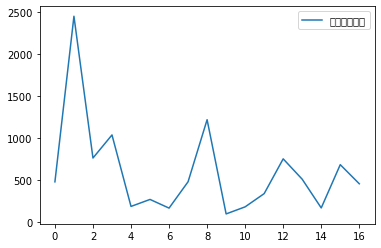

In [18]:
realfire.plot()

<AxesSubplot:>

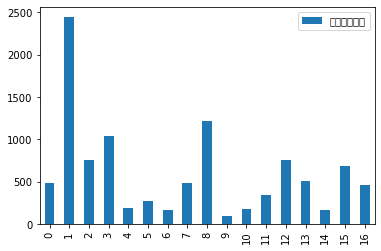

In [19]:
realfire.plot(kind='bar')

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [21]:
font_path='malgun.ttf'#\
fontprop=fm.FontProperties(fname=font_path,size=10)

<ipython-input-22-952b0afc6acd>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(realfire['sidoNm'],FontProperties=fontprop);


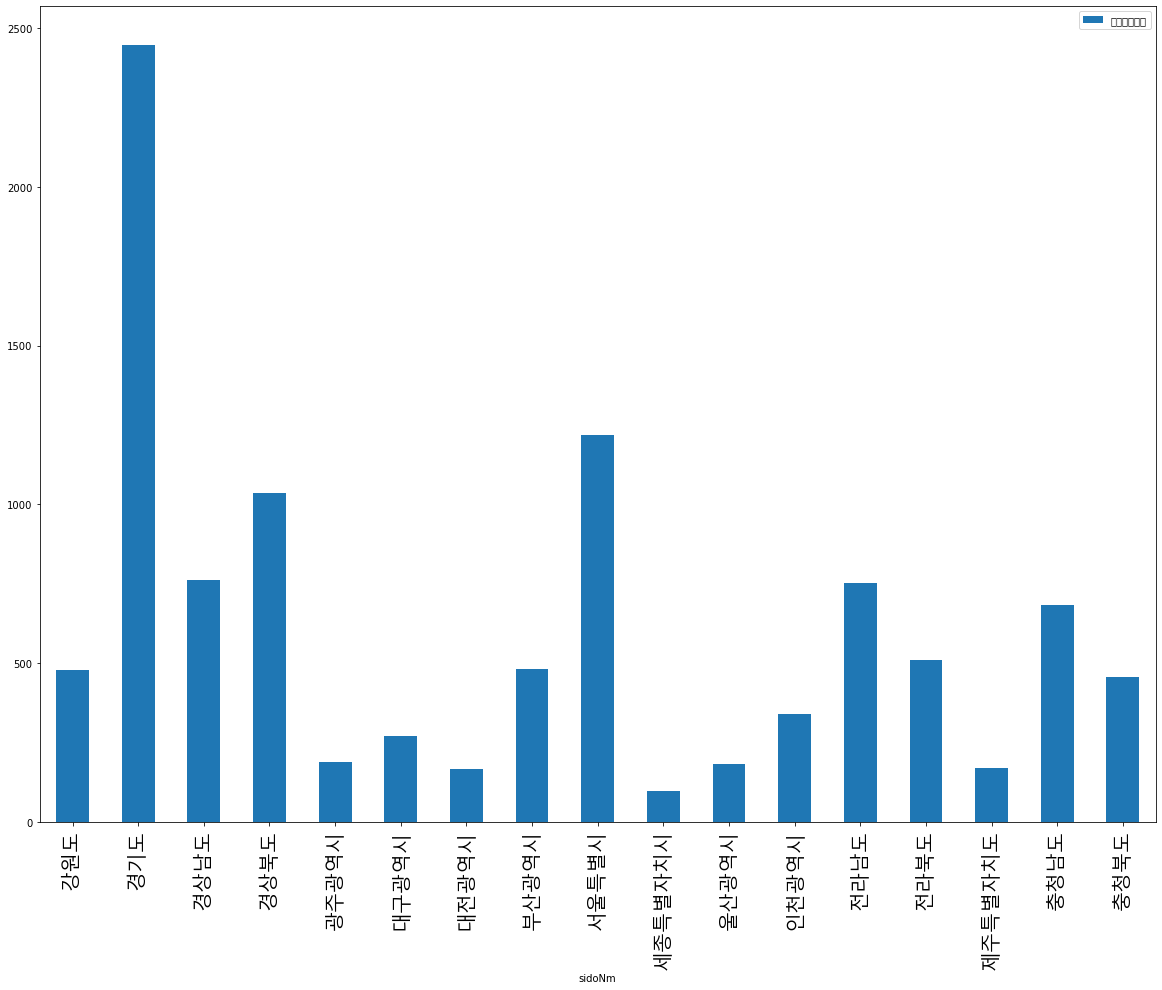

In [22]:
font_path='malgun.ttf'#\
fontprop=fm.FontProperties(fname=font_path,size=20)

fig,ax=plt.subplots(1,1,figsize=(20,15))
realfire[['sidoNm','실제처리건수']].groupby(['sidoNm'],as_index=True).sum().plot.bar(ax=ax)
ax.set_xticks(range(17))
ax.set_xticklabels(realfire['sidoNm'],FontProperties=fontprop);

In [23]:
fire.groupby('sidoNm',as_index=False)['발생일자'].count()

,sidoNm,발생일자
0,강원도,73
1,경기도,73
2,경상남도,73
3,경상북도,73
4,광주광역시,73
5,대구광역시,73
6,대전광역시,73
7,부산광역시,73
8,서울특별시,73
9,세종특별자치시,70


In [24]:
fire.groupby('sidoNm',as_index=False)['화재접수건수'].sum()

,sidoNm,화재접수건수
0,강원도,665
1,경기도,10702
2,경상남도,2819
3,경상북도,3062
4,광주광역시,481
5,대구광역시,964
6,대전광역시,483
7,부산광역시,821
8,서울특별시,2166
9,세종특별자치시,230


In [25]:
accident=pd.read_csv('Untitled Folder/accident.csv',encoding='euc-kr')
accident

,sidoNm,vctmPercnt,lifeDmgPercnt,injrdprPercnt,firePlceSctnNm,ocprptDmgSbttAmtrnYmd,ocrnMnb,ocrnYmd
0,서울특별시,0,0,0,쓰레기,731,2,20210121
1,서울특별시,0,0,0,고시원(원룸텔),247,1,20210121
2,서울특별시,0,0,0,다세대주택,331,1,20210121
3,서울특별시,0,0,0,여관,11,1,20210121
4,서울특별시,0,0,0,아파트,1856,2,20210121
...,...,...,...,...,...,...,...,...
3645,강원도,0,0,0,단독주택,4894,2,20210403
3646,강원도,0,0,0,기타 건축물,7312,1,20210403
3647,충청북도,0,0,0,단독주택,58599,2,20210403
3648,충청북도,0,0,0,기타야외,108,1,20210403


fire데이터를 통해 월별, 도시별 각 몇회씩 발생했는지 확인해보도록 하자
1. 날짜별, 2. 도시별

In [26]:
fire

,sidoNm,오보처리건수,자체진화건수,화재접수건수,상황종료건수,발생일자,허위신고건수,실제처리건수
0,서울특별시,21,9,54,13,20210121,0,33
1,부산광역시,8,1,21,12,20210121,0,13
2,대구광역시,12,1,16,3,20210121,0,4
3,인천광역시,16,0,20,2,20210121,0,4
4,광주광역시,5,0,5,0,20210121,0,0
...,...,...,...,...,...,...,...,...
1232,전라북도,0,0,2,1,20210403,0,2
1233,전라남도,4,1,12,4,20210403,0,8
1234,경상북도,26,1,49,6,20210403,0,23
1235,경상남도,15,1,32,4,20210403,0,17


In [27]:
fire['발생일자'].dtypes

dtype('int64')

In [28]:
Jan = fire[fire['발생일자'] <20210200]
Feb = fire[(fire['발생일자'] >=20210200) & (fire['발생일자'] <20210300)]
Mar = fire[(fire["발생일자"] <=20210300) & (fire["발생일자"] <20210400)]
Apr = fire[fire['발생일자']>=20210400]

In [29]:
jan_city=Jan.groupby('sidoNm').sum()
jan_city

,오보처리건수,자체진화건수,화재접수건수,상황종료건수,발생일자,허위신고건수,실제처리건수
sidoNm,,,,,,,
강원도,19,9,72,39,222311386,0,53
경기도,1172,48,1524,213,222311386,0,352
경상남도,300,15,408,69,222311386,0,108
경상북도,248,7,382,90,222311386,1,133
광주광역시,39,5,59,13,222311386,0,20
대구광역시,112,11,151,26,222311386,0,39
대전광역시,53,8,76,15,222311386,0,23
부산광역시,55,10,134,65,222311386,0,79
서울특별시,129,46,326,116,222311386,0,197


In [30]:
feb_city=Feb.groupby('sidoNm').sum()
feb_city

,오보처리건수,자체진화건수,화재접수건수,상황종료건수,발생일자,허위신고건수,실제처리건수
sidoNm,,,,,,,
강원도,68,34,290,166,565886006,0,222
경기도,3087,127,4051,621,565886006,1,963
경상남도,846,34,1189,239,565886006,2,341
경상북도,844,15,1323,304,565886006,0,479
광주광역시,97,10,170,56,565886006,0,73
대구광역시,283,25,395,80,565886006,1,111
대전광역시,113,19,177,41,565886006,0,64
부산광역시,128,41,332,149,565886006,0,204
서울특별시,378,116,837,271,565886006,0,459


In [31]:
mar_city=Mar.groupby('sidoNm').sum()
mar_city

,오보처리건수,자체진화건수,화재접수건수,상황종료건수,발생일자,허위신고건수,실제처리건수
sidoNm,,,,,,,
강원도,87,43,362,205,788197392,0,275
경기도,4259,175,5575,834,788197392,1,1315
경상남도,1146,49,1597,308,788197392,2,449
경상북도,1092,22,1705,394,788197392,1,612
광주광역시,136,15,229,69,788197392,0,93
대구광역시,395,36,546,106,788197392,1,150
대전광역시,166,27,253,56,788197392,0,87
부산광역시,183,51,466,214,788197392,0,283
서울특별시,507,162,1163,387,788197392,0,656


In [32]:
apr_city=Apr.groupby('sidoNm').sum()
apr_city

,오보처리건수,자체진화건수,화재접수건수,상황종료건수,발생일자,허위신고건수,실제처리건수
sidoNm,,,,,,,
강원도,11,2,33,14,60631206,0,22
경기도,362,18,540,85,60631206,0,178
경상남도,47,3,87,20,60631206,0,40
경상북도,63,1,120,19,60631206,0,57
광주광역시,17,2,26,6,60631206,0,9
대구광역시,31,2,46,10,60631206,0,15
대전광역시,17,3,29,7,60631206,0,12
부산광역시,11,4,29,13,60631206,0,18
서울특별시,36,19,102,30,60631206,1,65


accident데이터를 통해 2021년 1월 21~2021년 4월 3일동안 얼마나 사고피해가 발생했는지 알아보도록 하자

In [33]:
accident.rename(columns={'vctmPercnt':'사고자인원수','lifeDmgPercnt':'인명피해인원수','injrdprPercnt':'부상자인원수','firePlceSctnNm':'화재장소구분명','ocprptDmgSbttAmtrnYmd':'재산피해소계금액','ocrnMnb':'발생건수','ocrnYmd':'발생일자'},inplace=True)

In [34]:
accident

,sidoNm,사고자인원수,인명피해인원수,부상자인원수,화재장소구분명,재산피해소계금액,발생건수,발생일자
0,서울특별시,0,0,0,쓰레기,731,2,20210121
1,서울특별시,0,0,0,고시원(원룸텔),247,1,20210121
2,서울특별시,0,0,0,다세대주택,331,1,20210121
3,서울특별시,0,0,0,여관,11,1,20210121
4,서울특별시,0,0,0,아파트,1856,2,20210121
...,...,...,...,...,...,...,...,...
3645,강원도,0,0,0,단독주택,4894,2,20210403
3646,강원도,0,0,0,기타 건축물,7312,1,20210403
3647,충청북도,0,0,0,단독주택,58599,2,20210403
3648,충청북도,0,0,0,기타야외,108,1,20210403


### 1. 도시를 기준으로 발생건수, 재산피해소계금액 파악
### 2. 발생일자를 기준으로 발생건수 파악, 이로 인해 어느날짜대가 많이 발생하는지 파악
### 3. 화재장소구분명을 기준으로 발생건수, 피해금액 파악

In [35]:
accident.groupby('sidoNm').sum()

,사고자인원수,인명피해인원수,부상자인원수,재산피해소계금액,발생건수,발생일자
sidoNm,,,,,,
강원도,1,16,15,2173595,156,2647542134
경기도,11,99,88,33043928,1531,22110019594
경상북도,0,0,0,38203,4,40420640
광주광역시,2,9,7,1247352,175,3435743781
대구광역시,0,16,16,1065791,264,5012141201
대전광역시,4,16,12,871226,165,3233640779
부산광역시,4,38,34,906627,461,8124518331
서울특별시,8,68,60,2408961,1052,16127780595
세종특별자치시,0,5,5,446627,57,1151983733


In [36]:
##1. 도시를 기준으로 발생건수 파악
accident.dtypes
arise=accident.groupby('sidoNm',as_index=False)['발생건수'].sum()
arise

,sidoNm,발생건수
0,강원도,156
1,경기도,1531
2,경상북도,4
3,광주광역시,175
4,대구광역시,264
5,대전광역시,165
6,부산광역시,461
7,서울특별시,1052
8,세종특별자치시,57
9,울산광역시,174


<ipython-input-37-8e925d72519c>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(arise['sidoNm'],FontProperties=fontprop);
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48156 missing from current f

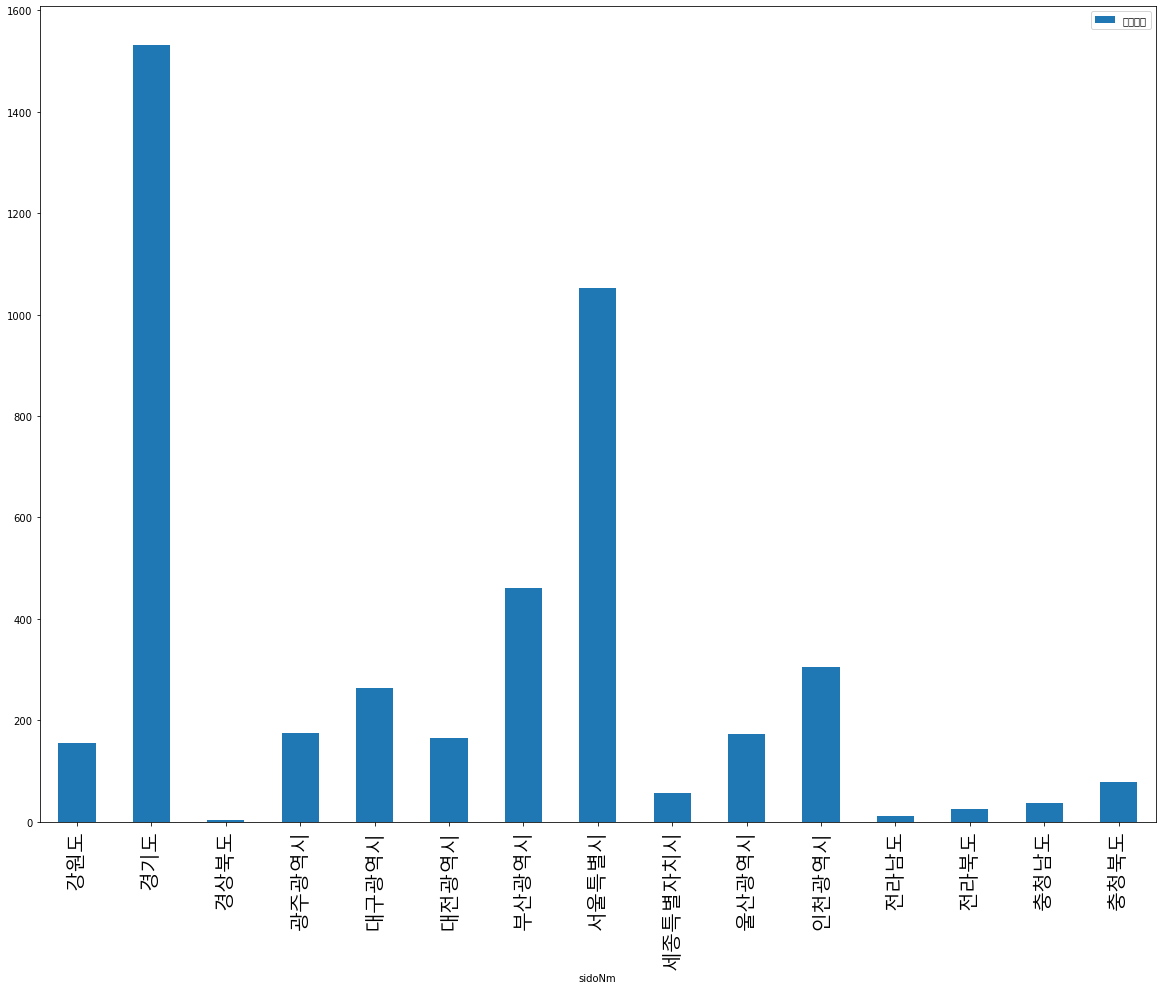

In [37]:
font_path='malgun.ttf'#\
fontprop=fm.FontProperties(fname=font_path,size=20)

fig,ax=plt.subplots(1,1,figsize=(20,15))
arise[['sidoNm','발생건수']].groupby(['sidoNm'],as_index=True).sum().plot.bar(ax=ax)
ax.set_xticks(range(15))
ax.set_xticklabels(arise['sidoNm'],FontProperties=fontprop);

In [38]:
#도시를 기준으로 재산피해소계금액 파악
harm=accident.groupby('sidoNm',as_index=False)['재산피해소계금액'].sum()
harm

,sidoNm,재산피해소계금액
0,강원도,2173595
1,경기도,33043928
2,경상북도,38203
3,광주광역시,1247352
4,대구광역시,1065791
5,대전광역시,871226
6,부산광역시,906627
7,서울특별시,2408961
8,세종특별자치시,446627
9,울산광역시,1243342


<ipython-input-39-c69d9ba283ff>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(harm['sidoNm'],FontProperties=fontprop)


[Text(0, 0, '강원도'),
 Text(1, 0, '경기도'),
 Text(2, 0, '경상북도'),
 Text(3, 0, '광주광역시'),
 Text(4, 0, '대구광역시'),
 Text(5, 0, '대전광역시'),
 Text(6, 0, '부산광역시'),
 Text(7, 0, '서울특별시'),
 Text(8, 0, '세종특별자치시'),
 Text(9, 0, '울산광역시'),
 Text(10, 0, '인천광역시'),
 Text(11, 0, '전라남도'),
 Text(12, 0, '전라북도'),
 Text(13, 0, '충청남도'),
 Text(14, 0, '충청북도')]

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-package

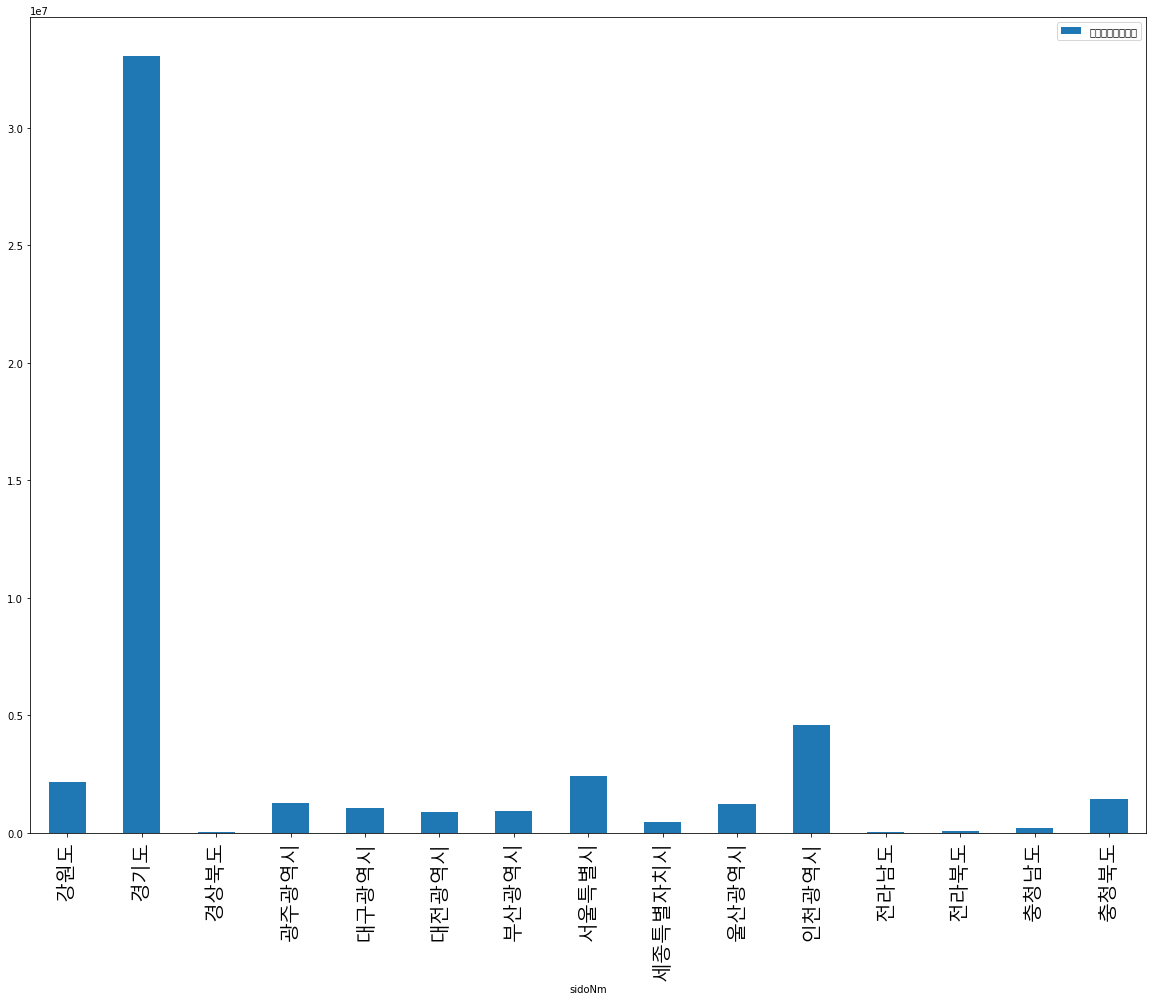

In [39]:
font_path='malgun.ttf'#\
fontprop=fm.FontProperties(fname=font_path,size=20)

fig,ax=plt.subplots(1,1,figsize=(20,15))
harm[['sidoNm','재산피해소계금액']].groupby(['sidoNm'],as_index=True).sum().plot.bar(ax=ax)
ax.set_xticks(range(15))
ax.set_xticklabels(harm['sidoNm'],FontProperties=fontprop)

#### 수도권, 특히 경기도쪽이 화재가 가장 많이 발생했고 이에 따른 피해금액이 가장 많은 것으로 확인되었음

In [40]:
accident.groupby('발생일자').sum()

,사고자인원수,인명피해인원수,부상자인원수,재산피해소계금액,발생건수
발생일자,,,,,
20210121,1,4,3,1955454,64
20210122,1,4,3,537955,61
20210123,1,3,2,1267891,65
20210124,0,5,5,332960,54
20210125,1,4,3,189577,61
...,...,...,...,...,...
20210330,0,2,2,295595,62
20210331,0,14,14,400592,68
20210401,0,3,3,114179,70


In [41]:
accident.groupby('발생일자').sum()

,사고자인원수,인명피해인원수,부상자인원수,재산피해소계금액,발생건수
발생일자,,,,,
20210121,1,4,3,1955454,64
20210122,1,4,3,537955,61
20210123,1,3,2,1267891,65
20210124,0,5,5,332960,54
20210125,1,4,3,189577,61
...,...,...,...,...,...
20210330,0,2,2,295595,62
20210331,0,14,14,400592,68
20210401,0,3,3,114179,70


In [42]:
arise2=accident.groupby('발생일자',as_index=False)['발생건수'].sum()
arise2

,발생일자,발생건수
0,20210121,64
1,20210122,61
2,20210123,65
3,20210124,54
4,20210125,61
...,...,...
68,20210330,62
69,20210331,68
70,20210401,70
71,20210402,62


In [43]:
arise2.sort_values('발생건수',ascending=False)

,발생일자,발생건수
36,20210226,72
9,20210130,71
46,20210308,71
70,20210401,70
23,20210213,70
...,...,...
20,20210210,56
26,20210216,55
42,20210304,54
3,20210124,54


In [44]:
arise2.sort_values('발생건수',ascending=False).head(15)

,발생일자,발생건수
36,20210226,72
9,20210130,71
46,20210308,71
70,20210401,70
23,20210213,70
27,20210217,69
69,20210331,68
62,20210324,68
61,20210323,68
25,20210215,67


In [45]:
arise2.describe()

,발생일자,발생건수
count,7.300000e+01,73.000000
mean,2.021025e+07,61.616438
std,7.572849e+01,4.449189
min,2.021012e+07,52.000000
25%,2.021021e+07,58.000000
50%,2.021023e+07,61.000000
75%,2.021032e+07,65.000000
max,2.021040e+07,72.000000


#### arise2데이터를 보면 특정 기간에 집중적으로 화재가 발생한다는 결론은 도출되지 않는다. 하지만 매일마다 약 62건의 화재가 발생하고 있으며(도시무관), 가장 많은 경우는 하루에 72건까지 발생하기도 한다

In [46]:
harm2=accident.groupby('발생일자',as_index=False)['재산피해소계금액'].sum()
harm2

,발생일자,재산피해소계금액
0,20210121,1955454
1,20210122,537955
2,20210123,1267891
3,20210124,332960
4,20210125,189577
...,...,...
68,20210330,295595
69,20210331,400592
70,20210401,114179
71,20210402,883312


In [47]:
location=accident.groupby('화재장소구분명',as_index=False)['발생건수'].sum()
location

,화재장소구분명,발생건수
0,PC방(인터넷게임제공업),2
1,가로등,3
2,간이음식점,2
3,간이음식점(휴게),2
4,게임제공업,2
...,...,...
214,화물자동차,113
215,화학공업,7
216,횟집,39
217,횟집(휴게),1


In [48]:
location.describe()

,발생건수
count,219.000000
mean,20.538813
std,54.122543
min,1.000000
25%,2.000000
50%,5.000000
75%,12.500000
max,403.000000


In [49]:
location.sort_values('발생건수',ascending=False).head(20)

,화재장소구분명,발생건수
133,쓰레기,403
135,아파트,370
72,단독주택,334
59,기타야외,243
70,다세대주택,215
129,승용자동차,215
69,다가구주택,209
28,기타 건축물,168
208,한식,118
214,화물자동차,113


In [50]:
location.sort_values('발생건수',ascending=False).tail(20)

,화재장소구분명,발생건수
113,사찰,1
112,사진관,1
107,분뇨시설,1
105,복합유통제공업,1
104,복합영상물제공업,1
100,변압기,1
96,"발전소(수력, 화력)",1
95,바지선,1
94,민박,1
93,문방구,1


In [51]:
location2=accident.groupby('화재장소구분명',as_index=False)['재산피해소계금액'].sum()
location2

,화재장소구분명,재산피해소계금액
0,PC방(인터넷게임제공업),869
1,가로등,1005
2,간이음식점,18629
3,간이음식점(휴게),9547
4,게임제공업,54942
...,...,...
214,화물자동차,385787
215,화학공업,171872
216,횟집,68565
217,횟집(휴게),110


In [52]:
location2.sort_values('재산피해소계금액',ascending=False).head(20)

,화재장소구분명,재산피해소계금액
23,그 밖의 공업,8682857
24,금속기계 및 기구공업,3960293
185,"창고, 물품저장소",3378343
55,기타 창고,3283515
72,단독주택,2715745
6,계사,1941062
176,제재 및 목공업,1795141
51,기타 작업장,1750285
9,"고철처리소, 고물상",1573924
135,아파트,1561483


In [53]:
location2.sort_values('재산피해소계금액',ascending=False).tail(20)

,화재장소구분명,재산피해소계금액
45,기타 운동시설,348
33,기타 군용차량,330
5,경로당,309
155,유치원,289
91,목초지,140
150,외국어학원,133
217,횟집(휴게),110
207,포장마차,100
46,기타 위락시설,64
178,종합학원,60


In [54]:
location_unit=accident.groupby('화재장소구분명',as_index=False)['발생건수','재산피해소계금액'].sum()
location_unit

<ipython-input-54-8a7770b9f413>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  location_unit=accident.groupby('화재장소구분명',as_index=False)['발생건수','재산피해소계금액'].sum()


,화재장소구분명,발생건수,재산피해소계금액
0,PC방(인터넷게임제공업),2,869
1,가로등,3,1005
2,간이음식점,2,18629
3,간이음식점(휴게),2,9547
4,게임제공업,2,54942
...,...,...,...
214,화물자동차,113,385787
215,화학공업,7,171872
216,횟집,39,68565
217,횟집(휴게),1,110


In [55]:
location_unit.sort_values('발생건수',ascending=False).head(20)

,화재장소구분명,발생건수,재산피해소계금액
133,쓰레기,403,486498
135,아파트,370,1561483
72,단독주택,334,2715745
59,기타야외,243,109559
70,다세대주택,215,685672
129,승용자동차,215,1416064
69,다가구주택,209,546136
28,기타 건축물,168,844589
208,한식,118,253122
214,화물자동차,113,385787


In [56]:
location_unit.sort_values('발생건수',ascending=False).tail(20)

,화재장소구분명,발생건수,재산피해소계금액
113,사찰,1,428
112,사진관,1,46439
107,분뇨시설,1,5544
105,복합유통제공업,1,6178
104,복합영상물제공업,1,33913
100,변압기,1,546
96,"발전소(수력, 화력)",1,950400
95,바지선,1,4400
94,민박,1,1845
93,문방구,1,7230


In [57]:
location_unit.sort_values('재산피해소계금액',ascending=False).head(20)

,화재장소구분명,발생건수,재산피해소계금액
23,그 밖의 공업,89,8682857
24,금속기계 및 기구공업,107,3960293
185,"창고, 물품저장소",68,3378343
55,기타 창고,29,3283515
72,단독주택,334,2715745
6,계사,10,1941062
176,제재 및 목공업,16,1795141
51,기타 작업장,28,1750285
9,"고철처리소, 고물상",10,1573924
135,아파트,370,1561483


In [58]:
location_unit.sort_values('재산피해소계금액',ascending=False).tail(20)

,화재장소구분명,발생건수,재산피해소계금액
45,기타 운동시설,1,348
33,기타 군용차량,1,330
5,경로당,1,309
155,유치원,2,289
91,목초지,1,140
150,외국어학원,1,133
217,횟집(휴게),1,110
207,포장마차,1,100
46,기타 위락시설,2,64
178,종합학원,1,60


accident 데이터역시 발생월을 기준으로 얼마나 발생했는지 계산해본다

In [70]:
accident

,sidoNm,사고자인원수,인명피해인원수,부상자인원수,화재장소구분명,재산피해소계금액,발생건수,발생일자
0,서울특별시,0,0,0,쓰레기,731,2,20210121
1,서울특별시,0,0,0,고시원(원룸텔),247,1,20210121
2,서울특별시,0,0,0,다세대주택,331,1,20210121
3,서울특별시,0,0,0,여관,11,1,20210121
4,서울특별시,0,0,0,아파트,1856,2,20210121
...,...,...,...,...,...,...,...,...
3645,강원도,0,0,0,단독주택,4894,2,20210403
3646,강원도,0,0,0,기타 건축물,7312,1,20210403
3647,충청북도,0,0,0,단독주택,58599,2,20210403
3648,충청북도,0,0,0,기타야외,108,1,20210403


In [71]:
accident['발생일자'].dtypes

dtype('int64')

In [72]:
jan = accident[accident['발생일자'] <20210200]
feb = accident[(accident['발생일자'] >=20210200) & (accident['발생일자'] <20210300)]
mar = accident[(accident["발생일자"] <=20210300) & (accident["발생일자"] <20210400)]
apr = accident[accident['발생일자']>=20210400]

월별로 지역별로 얼마나 발생했는지, 화재장소구분별로 얼마나 발생했는지 파악해보려고 한다.

In [77]:
jan_ct=jan.groupby('sidoNm').sum() #1월
jan_ct

,사고자인원수,인명피해인원수,부상자인원수,재산피해소계금액,발생건수,발생일자
sidoNm,,,,,,
강원도,0,3,3,730012,29,565883491
경기도,1,14,13,4913558,212,2970888521
광주광역시,0,1,1,63601,21,383992407
대구광역시,0,5,5,189462,40,767984772
대전광역시,0,0,0,85733,22,444622745
부산광역시,1,5,4,56960,77,1374288558
서울특별시,2,10,8,501820,173,2607106285
세종특별자치시,0,3,3,96770,10,202101255
울산광역시,0,1,1,45383,20,363782301


In [75]:
feb_ct=feb.groupby('sidoNm').sum()
feb_ct

,사고자인원수,인명피해인원수,부상자인원수,재산피해소계금액,발생건수,발생일자
sidoNm,,,,,,
강원도,0,1,1,636280,53,808408427
경기도,8,36,28,16069950,573,8407449050
광주광역시,2,5,3,816054,71,1394504707
대구광역시,0,6,6,232164,112,2101862190
대전광역시,2,5,3,215664,64,1273243565
부산광역시,2,19,17,141833,195,3415526248
서울특별시,5,25,20,716110,401,6022644200
세종특별자치시,0,2,2,301783,25,505255361
울산광역시,1,3,2,263216,79,1434925260


In [78]:
mar_ct=mar.groupby('sidoNm').sum()
mar_ct

,사고자인원수,인명피해인원수,부상자인원수,재산피해소계금액,발생건수,발생일자
sidoNm,,,,,,
강원도,0,4,4,1366292,82,1374291918
경기도,9,50,41,20983508,785,11378337571
광주광역시,2,6,4,879655,92,1778497114
대구광역시,0,11,11,421626,152,2869846962
대전광역시,2,5,3,301397,86,1717866310
부산광역시,3,24,21,198793,272,4789814806
서울특별시,7,35,28,1217930,574,8629750485
세종특별자치시,0,5,5,398553,35,707356616
울산광역시,1,4,3,308599,99,1798707561


In [79]:
apr_ct=apr.groupby('sidoNm').sum()
apr_ct

,사고자인원수,인명피해인원수,부상자인원수,재산피해소계금액,발생건수,발생일자
sidoNm,,,,,,
강원도,0,0,0,12206,3,40420806
경기도,1,9,8,243792,74,1010520102
광주광역시,0,1,1,153954,9,181893621
대구광역시,0,0,0,61244,11,161683217
대전광역시,0,1,1,51069,10,202104020
부산광역시,0,1,1,39903,17,323366431
서울특별시,0,0,0,73932,45,707364061
세종특별자치시,0,0,0,16027,2,40420806
울산광역시,0,1,1,659815,8,161683215


In [91]:
jan_place=jan.groupby('화재장소구분명').sum().sort_values(by='발생건수',ascending=False)
jan_place

,사고자인원수,인명피해인원수,부상자인원수,재산피해소계금액,발생건수,발생일자
화재장소구분명,,,,,,
아파트,0,6,6,153846,68,848825299
단독주택,2,7,5,607345,55,767984800
쓰레기,0,0,0,9807,45,586093662
다가구주택,1,3,2,168717,38,565883528
승용자동차,1,2,1,276422,33,424412641
...,...,...,...,...,...,...
요업 및 토석공업,0,0,0,1952,1,20210121
우사,0,0,0,466,1,20210124
의류,0,0,0,765,1,20210121


In [92]:
feb_place=feb.groupby('화재장소구분명').sum().sort_values(by='발생건수',ascending=False)
feb_place

,사고자인원수,인명피해인원수,부상자인원수,재산피해소계금액,발생건수,발생일자
화재장소구분명,,,,,,
쓰레기,0,0,0,440960,191,2324174714
아파트,2,17,15,577164,141,1919970297
단독주택,5,18,13,1221238,125,1697657895
다세대주택,5,15,10,260922,88,1414715029
기타야외,0,1,1,40529,87,1232823192
...,...,...,...,...,...,...
"제과점,빵집,떡집(휴게)",0,0,0,8683,1,20210216
모델하우스,0,0,0,216,1,20210228
"양수장, 정수장",0,0,0,2750,1,20210228


In [94]:
mar_place=mar.groupby('화재장소구분명').sum().sort_values(by='발생건수',ascending=False)
mar_place

,사고자인원수,인명피해인원수,부상자인원수,재산피해소계금액,발생건수,발생일자
화재장소구분명,,,,,,
쓰레기,0,0,0,450767,236,2910268376
아파트,2,23,21,731010,209,2768795596
단독주택,7,25,18,1828583,180,2465642695
기타야외,0,1,1,56029,118,1677445963
다세대주택,5,18,13,372549,112,1758287192
...,...,...,...,...,...,...
사회복지시설,0,0,0,396,1,20210129
사찰,0,0,0,428,1,20210126
간이음식점,0,1,1,10301,1,20210209


In [95]:
apr_place=apr.groupby('화재장소구분명').sum().sort_values(by='발생건수',ascending=False)
apr_place

,사고자인원수,인명피해인원수,부상자인원수,재산피해소계금액,발생건수,발생일자
화재장소구분명,,,,,,
아파트,0,2,2,71567,19,222314420
단독주택,0,0,0,108809,17,242524826
쓰레기,0,1,1,5861,16,181893615
승용자동차,0,1,1,73260,12,181893617
다가구주택,0,3,3,24651,11,161683220
다세대주택,1,1,0,30443,9,141472814
기타야외,0,0,0,1583,8,161683216
사유림,0,1,1,11275,7,60631204
기타 건축물,0,0,0,149739,7,141472814


소방안전교육을 받은 인원들의 비율을 예측한다.
2014~18년의 데이터를 바탕으로 19,20년도의 인원을 예측해본다

In [59]:
firetraining=pd.read_csv('Untitled Folder/firetraining.csv', encoding='cp949')
firetraining

,연도,총건수,총인원,유아건수,유아인원,초등학생건수,초등학생인원,중·고등학생건수,중·고등학생 인원,성인건수,성인인원,기타건수,기타인원
0,2014,55398,8701924,11175,1298314,6783,2382550,5298,1663001,31101,3259086,1041,98973
1,2015,53352,9308875,9700,1148589,6462,2623591,5722,1706755,30463,3750844,1005,79056
2,2016,58101,9736007,12975,1898042,6575,2651741,6447,1639587,29773,3339497,2331,207140
3,2017,71705,10664342,17429,2411212,10752,3203849,9003,1882440,31774,3028980,2747,137861
4,2018,62197,10009603,12917,1711085,8476,2950949,6425,1552432,28770,3406571,5609,388566


In [60]:
firetraining.dtypes

연도           int64
총건수          int64
총인원          int64
유아건수         int64
유아인원         int64
초등학생건수       int64
초등학생인원       int64
중·고등학생건수     int64
중·고등학생 인원    int64
성인건수         int64
성인인원         int64
기타건수         int64
기타인원         int64
dtype: object

In [61]:
firetraining.columns

Index(['연도', '총건수', '총인원', '유아건수', '유아인원', '초등학생건수', '초등학생인원', '중·고등학생건수',
       '중·고등학생 인원', '성인건수', '성인인원', '기타건수', '기타인원'],
      dtype='object')

In [62]:
firetraining['총비율']=firetraining['총건수']/firetraining['총인원']

In [63]:
firetraining

,연도,총건수,총인원,유아건수,유아인원,초등학생건수,초등학생인원,중·고등학생건수,중·고등학생 인원,성인건수,성인인원,기타건수,기타인원,총비율
0,2014,55398,8701924,11175,1298314,6783,2382550,5298,1663001,31101,3259086,1041,98973,0.006366
1,2015,53352,9308875,9700,1148589,6462,2623591,5722,1706755,30463,3750844,1005,79056,0.005731
2,2016,58101,9736007,12975,1898042,6575,2651741,6447,1639587,29773,3339497,2331,207140,0.005968
3,2017,71705,10664342,17429,2411212,10752,3203849,9003,1882440,31774,3028980,2747,137861,0.006724
4,2018,62197,10009603,12917,1711085,8476,2950949,6425,1552432,28770,3406571,5609,388566,0.006214


In [64]:
study=firetraining.groupby('연도',as_index=False)['총비율'].sum()
study

,연도,총비율
0,2014,0.006366
1,2015,0.005731
2,2016,0.005968
3,2017,0.006724
4,2018,0.006214


<ipython-input-65-8b1110fdc47a>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(study['연도'],FontProperties=fontprop);
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50984 missing from current font.

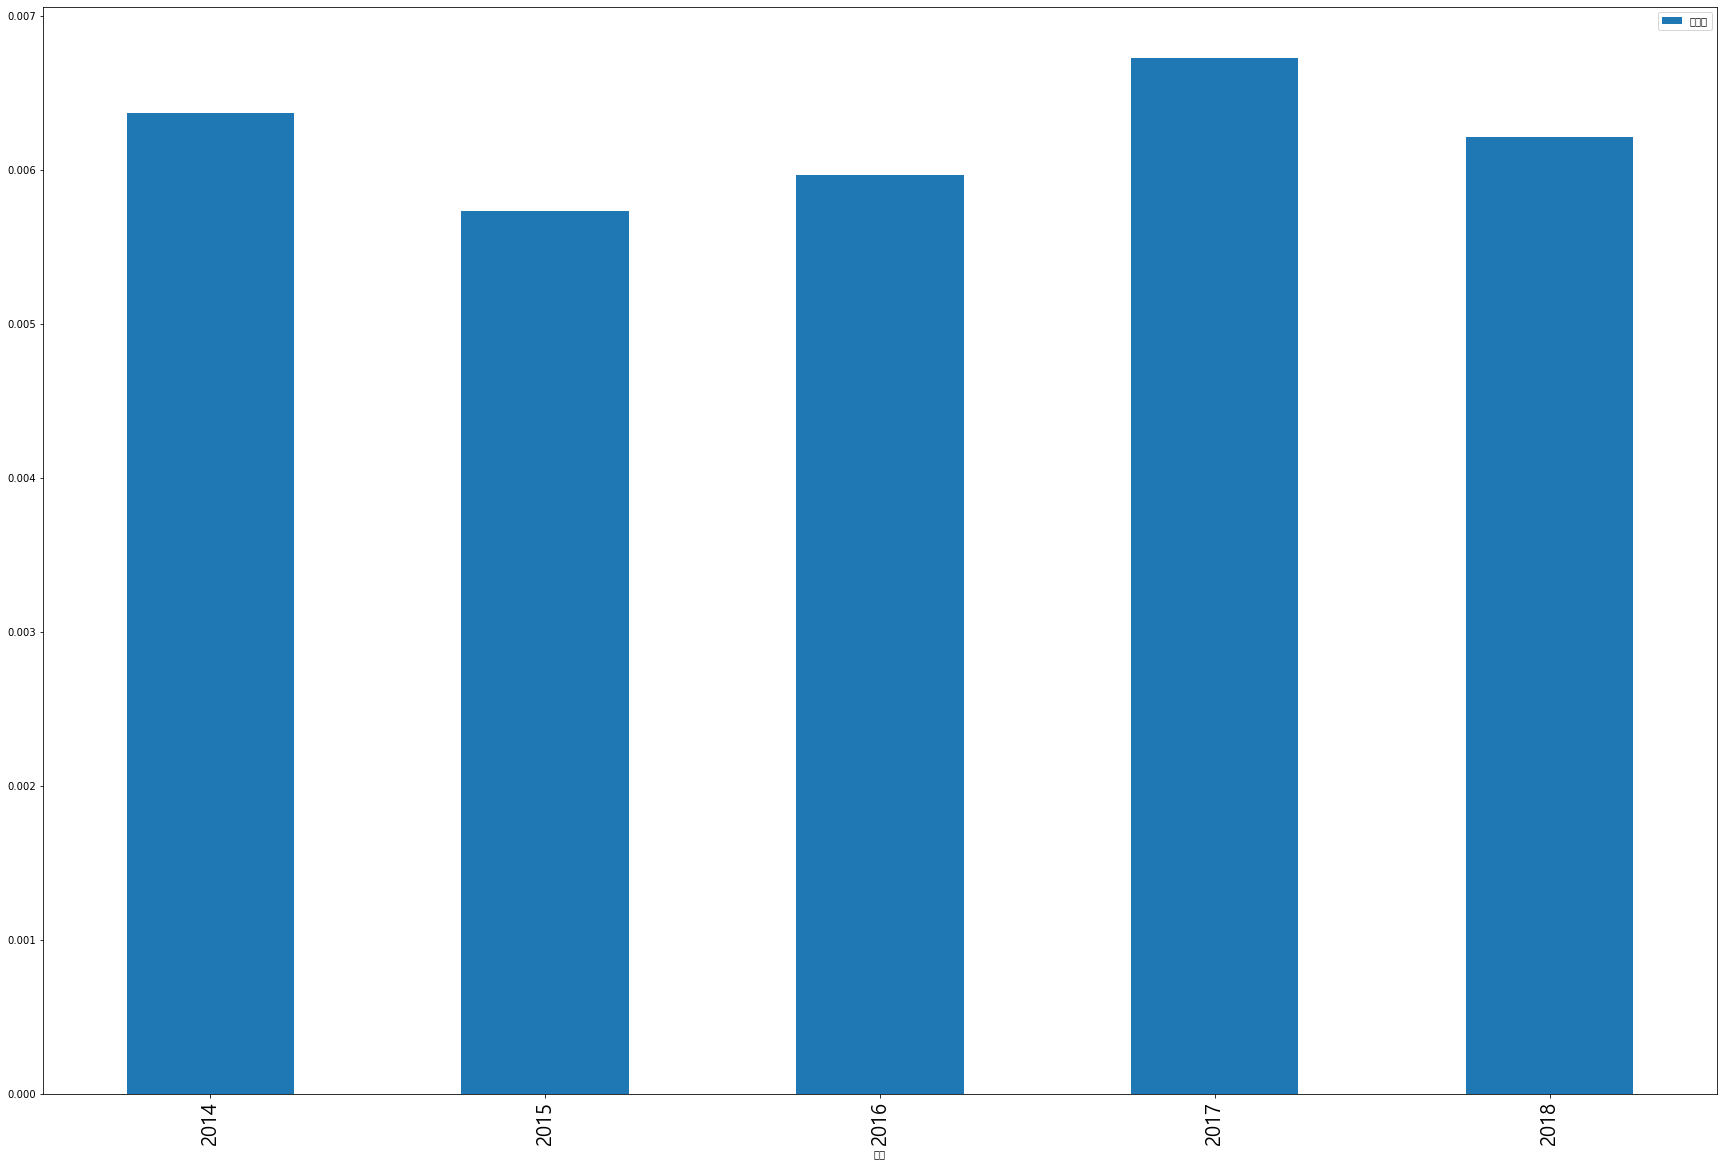

In [65]:
font_path='malgun.ttf'#\
fontprop=fm.FontProperties(fname=font_path,size=20)

fig,ax=plt.subplots(1,1,figsize=(30,20))
study[['연도','총비율']].groupby(['연도'],as_index=True).sum().plot.bar(ax=ax)
ax.set_xticks(range(5))
ax.set_xticklabels(study['연도'],FontProperties=fontprop);

각 가정별 화재안전장치 설치여부에 관한 데이터이다.
이를 통해 만일의 화재에 대한 위험성에 대한 생각을 엿볼 수 있다.

In [66]:
safe=pd.read_csv('Untitled Folder/safeplace.csv',encoding='cp949')
safe

,구분,시도본부,설문인원,모두 설치응답,설문결과
0,1,서울,13593,6375,46.90
1,2,부산,3055,1516,49.62
2,3,대구,2299,1135,49.37
3,4,인천,2195,1065,48.52
4,5,광주,1000,480,48.00
5,6,대전,1254,592,47.21
6,7,울산,1069,613,57.34
7,8,세종,125,98,78.40
8,9,경기,8719,4207,48.25
9,10,강원,1701,909,53.44


In [67]:
conc=safe.groupby('시도본부',as_index=False)['설문결과'].sum()
conc

,시도본부,설문결과
0,강원,53.44
1,경기,48.25
2,경남,48.44
3,경북,47.75
4,광주,48.00
5,대구,49.37
6,대전,47.21
7,부산,49.62
8,서울,46.90
9,세종,78.40


In [68]:
conc['설문결과'].sum()/conc['설문결과'].count()

52.13722222222222

평균과 비교했을때 과연 각 데이터는 얼마나 차이가 있을지 새로운 칸을 만들어 조사해보자.

평균 52%대에 지나지 않고 있으며, 화재예방에 대한 인식이 깊지 않음을 알 수 있다.

<ipython-input-69-45e3dfcd57cf>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(conc['시도본부'],FontProperties=fontprop);
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49444 missing from current font

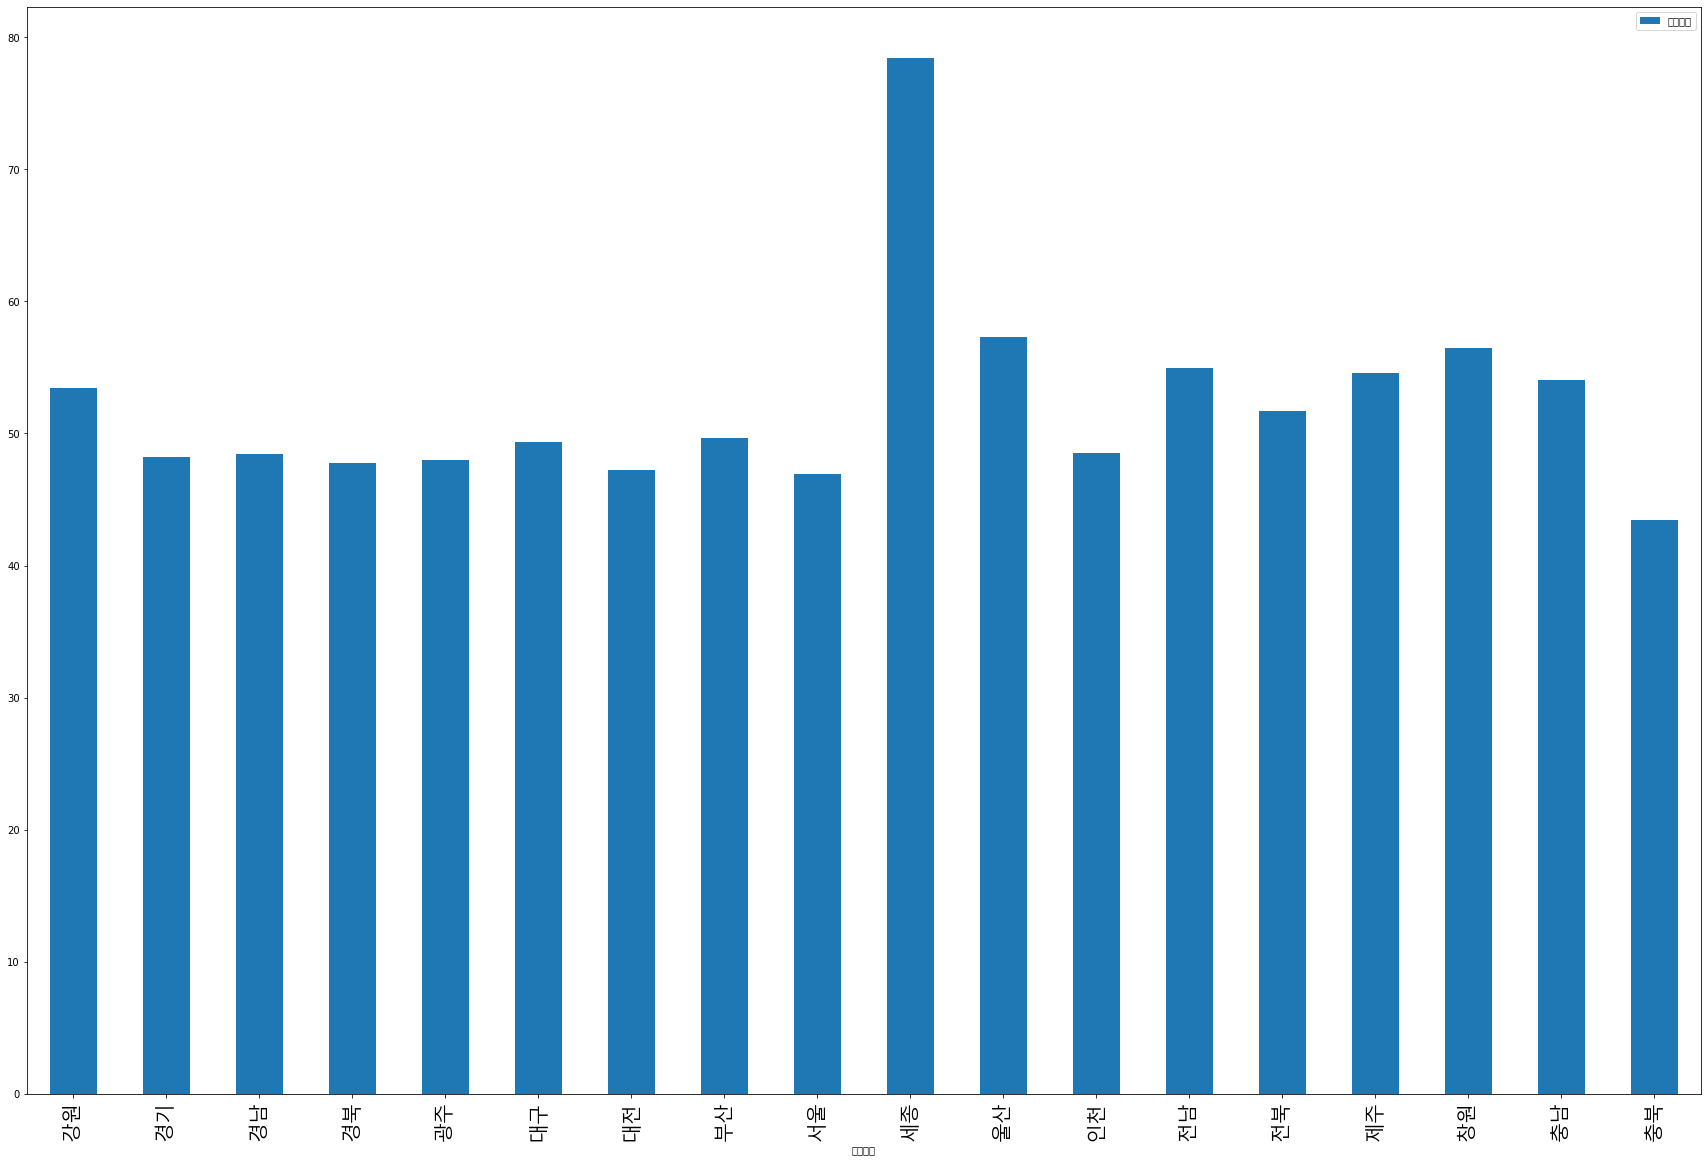

In [69]:
font_path='malgun.ttf'#\
fontprop=fm.FontProperties(fname=font_path,size=20)

fig,ax=plt.subplots(1,1,figsize=(30,20))
conc[['시도본부','설문결과']].groupby(['시도본부'],as_index=True).sum().plot.bar(ax=ax)
ax.set_xticks(range(18))
ax.set_xticklabels(conc['시도본부'],FontProperties=fontprop);